<a href="https://colab.research.google.com/github/Dennis-224/Data_cleaning/blob/main/Project1_Data_cleaning_with_pandas_numpy_and_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DSN CAPSTONE 1**
#**SCIENTIST: DENNIS OKEREKE**

FIRST we were given a house price dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ACTION 1: We now load our csv dataset file


In [ ]:
df = pd.read_csv('/content/House_Price - House_Price.csv')

# ACTION 2: Exploratory Data Analysis (EDA)


In [ ]:
print(df.describe(include= 'all'))
df.info()
df.head()

             price  crime_rate  resid_area    air_qual    room_num  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     22.528854    3.613524   41.136779    0.554695    6.284634   
std       9.182176    8.601545    6.860353    0.115878    0.702617   
min       5.000000    0.006320   30.460000    0.385000    3.561000   
25%      17.025000    0.082045   35.190000    0.449000    5.885500   
50%      21.200000    0.256510   39.690000    0.538000    6.208500   
75%      25.000000    3.677083   48.100000    0.624000    6.623500   
max      50.000000   88.976200   57.740000    0.871000    8.780000   

               age       dist1       dist2       dist3       dist4  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN 

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


## Time to detect outliers


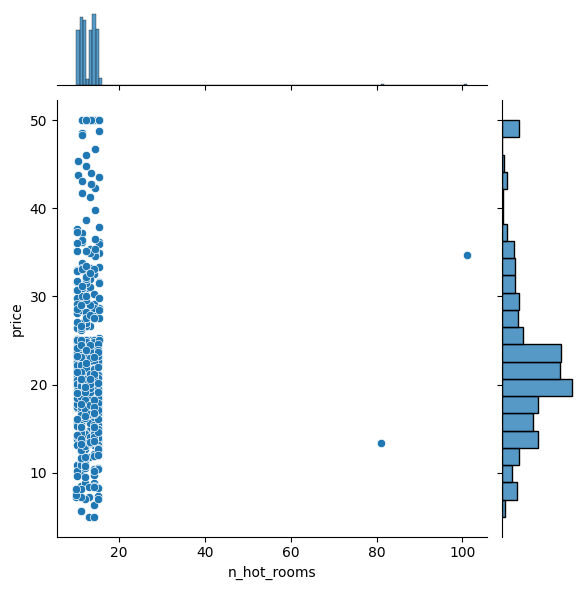

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.jointplot(x='n_hot_rooms', y='price', data=df) #sns.jointplot is for detecting relationship btw two variables
plt.show()

## In like manner for multiple columns...


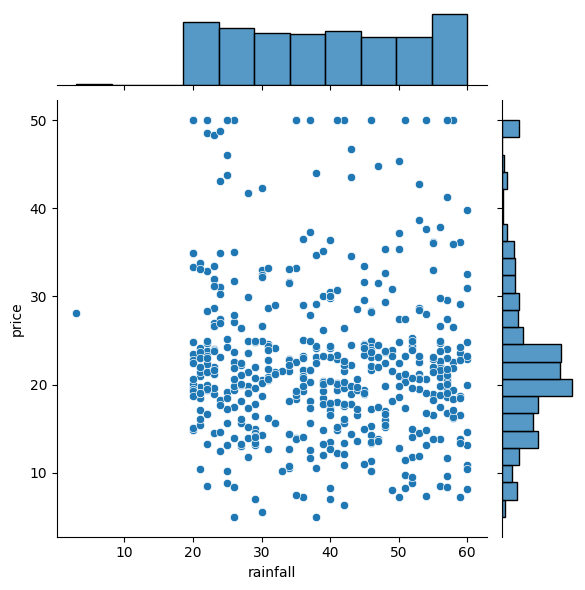

In [ ]:
for col in ['rainfall']: # replace or extend with other numeric cols
    sns.jointplot(x=col, y='price', data=df)
    plt.show()

## Categorical inspection and visualization


Unique values in airport column: ['YES' 'NO']


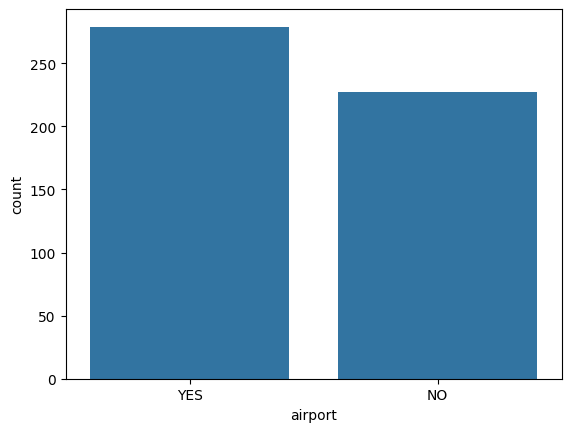

In [ ]:
print("Unique values in airport column:", df['airport'].unique())
sns.countplot(x='airport', data=df) #sns.countplot for frequency of a single categorical variable
plt.show()

## In like manner... general approach for categorical columns



Column: airport -- unique values: ['YES' 'NO']


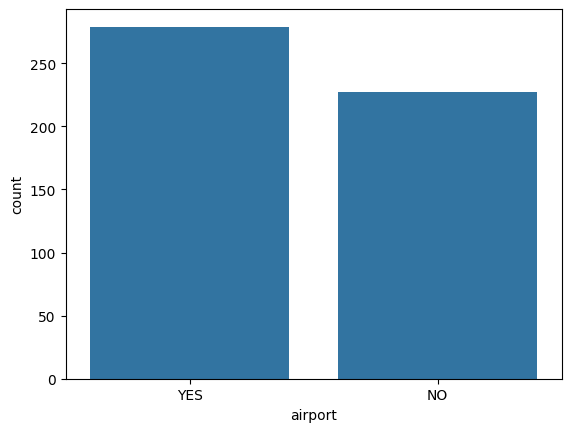

Column: waterbody -- unique values: ['River' 'Lake' 'Lake and River']


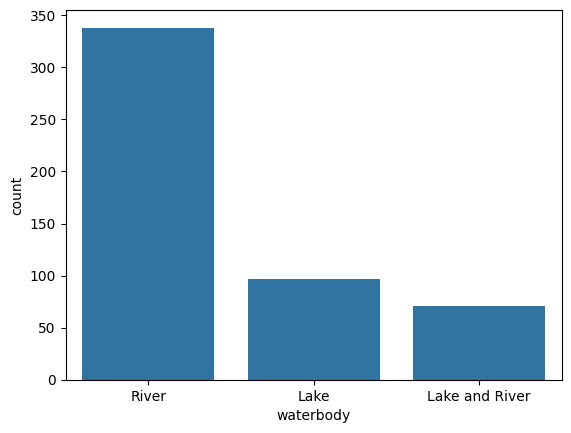

Column: bus_ter -- unique values: ['YES']


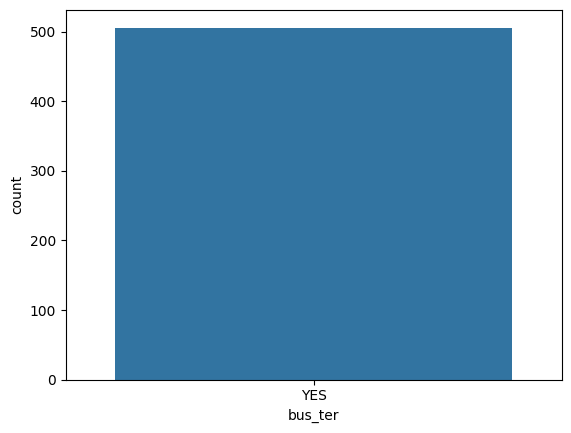

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist() #object dtype is for string
for col in cat_cols:
    print(f"Column: {col} -- unique values: {df[col].unique()}") #f string is a modern way to embed python expressions in a string
    sns.countplot(x=col, data=df)
    plt.show()

## Time to takle missing values
### And after cleaning we print the data again to confirm


In [ ]:
df['waterbody'] = df['waterbody'].fillna(df['waterbody'].mode()[0])
df['n_hos_beds'] = df['n_hos_beds'].fillna(df['n_hos_beds'].mode()[0])
print(df.describe(include= 'all'))
df.info()
df.head()

             price  crime_rate  resid_area    air_qual    room_num  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean     22.528854    3.613524   41.136779    0.554695    6.284634   
std       9.182176    8.601545    6.860353    0.115878    0.702617   
min       5.000000    0.006320   30.460000    0.385000    3.561000   
25%      17.025000    0.082045   35.190000    0.449000    5.885500   
50%      21.200000    0.256510   39.690000    0.538000    6.208500   
75%      25.000000    3.677083   48.100000    0.624000    6.623500   
max      50.000000   88.976200   57.740000    0.871000    8.780000   

               age       dist1       dist2       dist3       dist4  \
count   506.000000  506.000000  506.000000  506.000000  506.000000   
unique         NaN 

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,River,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


We continue with dealing with outliers




## Capping or Winsorization
Based on the visualizations, it appears that the outliers are on the higher end of the n_hot_rooms values. In this case, capping would be the appropriate method to handle these outliers. Capping involves setting a maximum value for the outliers, effectively replacing them with this upper limit. In layman terms when data is at higher side, you bring down to lower range


### Note: My Finding
 The quickest and best way to know which columns to cap involves a two-pronged approach: visual inspection using tools like box plots and the application of statistical rules like the IQR or Z-score methods, tailored to the data's distribution.

In [ ]:
np.percentile(df.n_hot_rooms,[99]) #we do the 99th percentile for capping

array([15.39952])

In [ ]:
#Where uv is upper value
uv = np.percentile(df.n_hot_rooms,[99])[0] #we want it to start from the very first column value.
#99th percentile(common capping practice) means only the top 1% of data points is affected, so much of the original data is preseved.

In [ ]:
df[(df.n_hot_rooms>uv)] #selects and displays the rows in the dataframe where value is greater than the calculated upper value.
#Used to inspect rows containing outliers based on the 99th percentile.
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv #implements capping. Identifies values greater than 3*uv and replaces them with 3*uv.
# This limits maximum values mitigating impact of outliers.

/tmp/ipython-input-4258174358.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv #implements capping. Identifies values greater than 3*uv and replaces them with 3*uv. This limits maximum values 

## So...
we check that its been effected...


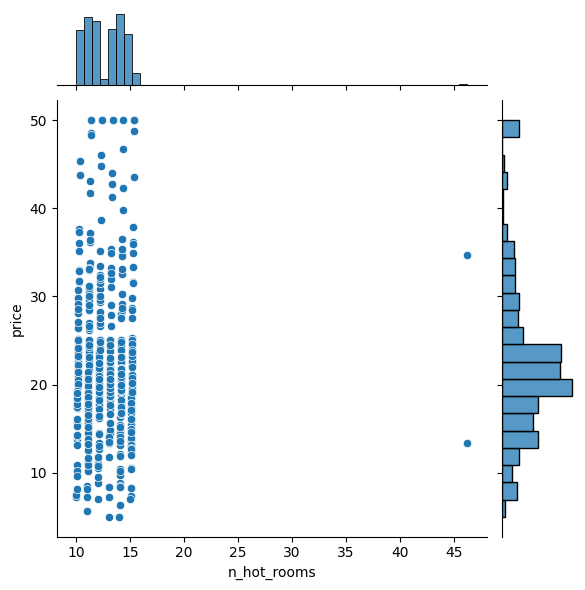

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.jointplot(x='n_hot_rooms', y='price', data=df)
plt.show() #Before the outliers was around 80 but now it comes down to 46

## Flooring

Is a technique used in data preprocessing to handle outliers that are significantly lower than the majority of the data. Similar to capping, which sets an upper limit for outliers, flooring sets a lower limit.

Essentially, any data point below a certain calculated minimum value (often a percentile like the 1st percentile) is replaced with that minimum value. This helps to reduce the impact of extremely low values on your analysis or model

Flooring is like an opposite to capping


In [ ]:
np.percentile(df.rainfall,[1])[0] #1 percentile is a common practice for flooring. Using the 1st percentile means that only the bottom 1% of the data points are affected,
#preserving much of the original data while mitigating the impact of these outliers.

np.float64(20.0)

In [ ]:
np.percentile(df.rainfall,[1])[0] # calculates the 1st percentile of the 'rainfall' column in your DataFrame df. The result is an array containing percentile value.
 #[0] accesses the first (and in this case, only) element of that array, which is the calculated 1st percentile value
lv = np.percentile(df.rainfall,[1])[0] #assigns calculated 1st percentile value to variable lv
df.rainfall[(df.rainfall< 0.3*lv)] = 0.3*lv # the boolean mask df.rainfall<0.3*lv is True for rows where the 'rainfall' value is less than 0.3 (30%) times the lower limit,
#and False otherwise. df.rainfall[...] uses this boolean mask to select only the rows in the 'rainfall' column where the condition is True(i.e the outliers at the lower end)

/tmp/ipython-input-1240847412.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.rainfall[(df.rainfall< 0.3*lv)] = 0.3*lv # the boolean mask df.rainfall<0.3*lv is True for rows where the 'rainfall' value is less than 0.3 (30%) times the 

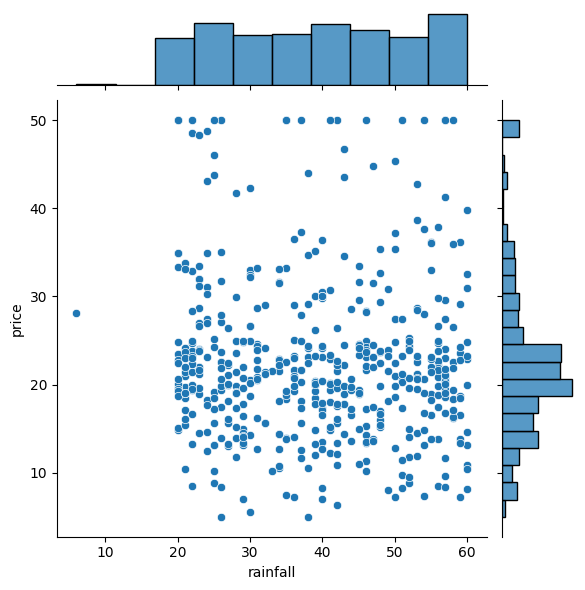

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
sns.jointplot(x='rainfall', y='price', data=df)
plt.show()

## Seasonality

Seasonality can affect our data
How could that happen?



*   **Rainfall**: This column directly relates to weather patterns, which are seasonal. High rainfall seasons could correlate with certain property conditions or impact outdoor amenities like parks.
*   **Waterbody** **levels**: If the "waterbody" column relates to natural water sources, their levels could fluctuate seasonally due to rainfall and evaporation, potentially influencing the desirability or accessibility of properties near them.


*   **Parks**: The usage and appeal of parks could be seasonal, affecting nearby property values or interest.
*   **Air** **quality**: Air quality can sometimes have seasonal variations depending on factors like temperature inversions, pollution sources, and wind patterns.

## Non Usable Variable

* If a table has just one value thats non usable bacause it won't relate with anything. An example is Bus_ter that has only YES
* if we get an initail data having low fill rate (i.e 60% data is missing), then we drop the entire data.
* Imagine we have a variable telling us make of cars. It can't help us in predicting house price so we delete such variable



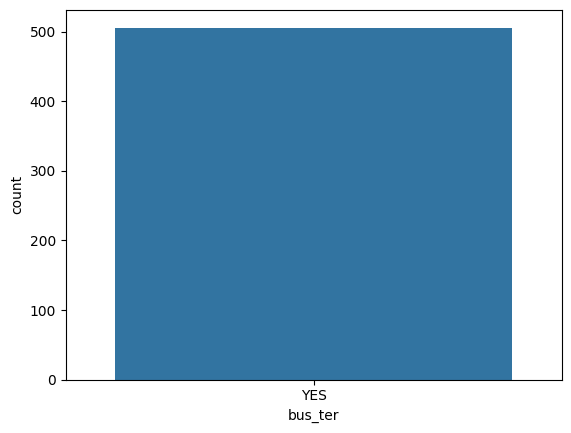

In [ ]:
df.bus_ter.unique().tolist()
sns.countplot(x=df.bus_ter)
df = df.drop('bus_ter', axis=1) #Now  after this when we check for bus_ter variable we'll get an error message

In [ ]:
df.bus_ter

AttributeError: 'DataFrame' object has no attribute 'bus_ter'

## Bivariate Analysis

Bivariate analysis is a statistical method used to explore the relationship between two variables. This can involve looking at how changes in one variable are associated with changes in the other, and the strength and direction of that association. Common techniques for bivariate analysis include:

* Scatter plots: To visualize the relationship between two numerical variables.
* Correlation coefficients: To quantify the strength and direction of the linear relationship between two numerical variables.
* Cross-tabulation and chi-square tests: To examine the relationship between two categorical variables.
* Box plots or violin plots: To compare the distribution of a numerical variable across different categories of a categorical variable.

Bivariate Analysis helps in understanding how variables interact with each other, which is crucial for identifying patterns, making predictions, and building models.

### Histogram
Now when we plot a histogram we get to see how skewed our data is.
A positively skewed data has the top of the bell on the left hand side. if the top of the bell is on the right hand side, then its negatively skewed.


### Skewed data

skewed data refers to a situation where the distribution of values in a dataset is asssymetyric, deviating from the normal or bell-shaped distribution. Skewness can have implications for statistical analysis and modeling, as it can affect the accuracy of assumptions made by certain methods.

Type

There are two common types of skewness:
1. Positive skewness: In this case, the tail of the distribution extends towards the right side, indicating a larger number of smaller values and a few extremely large values.
2. Negative skewness: Here the tail of the distribution extends towards the left side, indicating a larger number of larger values and a few extremely small values.


Handling skewed data is important because it can affect the performance of certain models and statistical tests that assume a normal distribution. Here are some common methods to handle skewed data:
1. Logarithmic transformation: Applying a logarithmic transformation to the skewed variable can compress the larger values and spread out the smaller values, reducing the skewness and making the distribution more symmetrical.
2. Square root transformation: Similar to the logarithmic transformation, the square root transformation can help reduce the skewness of the data.
3. Box-Cox transformation: The Box-Cox transformation is a more general transformation that can handle various types of skewness. It applies a power transformation to the data, allowing it to become more normally distributed.


/tmp/ipython-input-1143646034.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df.price, hist=True, kde=True)


<Axes: ylabel='Density'>

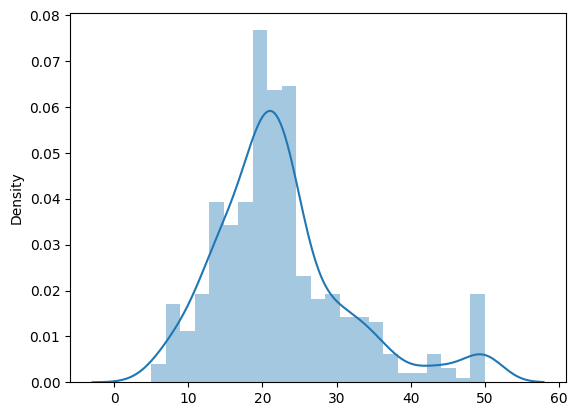

In [ ]:
sns.distplot(x= df.price, hist=True, kde=True)

## Logarithm or Square root

Logarithm and square root transformations are often used in data preprocessing, particularly when dealing with skewed data or when preparing data for certain statistical models that assume normality.

In this context, whereby we have already looked at the
distribution of the price variable using a histogram (which showed some skewness), here are some potential places where we might consider using logarithm or square root transformations:

1. **Handling Skewed Variables**: If any of the numerical features (like crime_rate, resid_area, air_qual, age, poor_prop, or even price itself if you plan to model it) are highly skewed, applying a logarithm or square root transformation can help make their distributions more symmetrical and closer to a normal distribution. This can be beneficial for some regression models.

2. **Stabilizing Variance:** For some variables, the variance might not be constant across the range of values. Transformations can sometimes help stabilize the variance, which is another assumption of certain statistical models.

3. **Before Modeling:** When you move towards building a predictive model (like linear regression) to predict house prices, transforming skewed independent variables can improve the performance and interpretability of the model.

To determine if a transformation is needed and which one to use, we need to:


*   Visualize the distribution of the variable (using histograms or density plots) to check for skewness.
*   Consider the relationship between the independent variables and the dependent variable (price). Transformations might help linearize non-linear relationships.

To apply these transformations we need functions like np.log() or np.sqrt() from NumPy to the relevant columns in your DataFrame.



<Axes: xlabel='crime_rate', ylabel='price'>

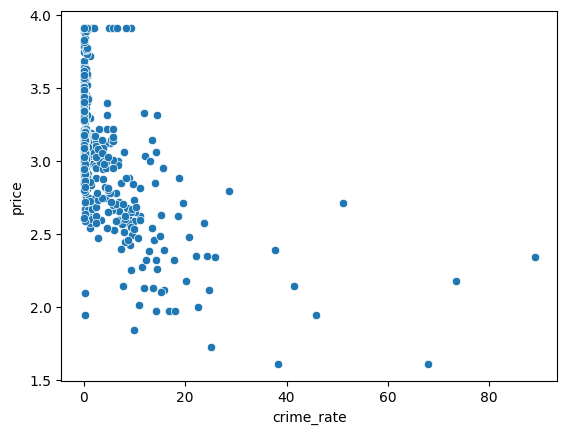

In [ ]:
sns.scatterplot(x=df.crime_rate, y=np.log(df.price)) #notice how we see abnomalities of some values towards 80

In [ ]:
np.log(df.crime_rate).describe() #The issue with logarithm is that it can lead to negative values. We don't want that!

,crime_rate
count,506.000000
mean,-0.780436
std,2.162050
min,-5.064036
25%,-2.500488
50%,-1.360641
75%,1.302119
max,4.488369


In [ ]:
np.log(1+ df.crime_rate).describe() #we rectify it by adding +1 to our code

,crime_rate
count,506.000000
mean,0.813418
std,1.022731
min,0.006300
25%,0.078853
50%,0.228336
75%,1.542674
max,4.499545


In [ ]:
# but square root doesn't need plus 1
np.sqrt(df.crime_rate).describe()

,crime_rate
count,506.000000
mean,1.229439
std,1.451263
min,0.079498
25%,0.286435
50%,0.506461
75%,1.917572
max,9.432720


In [ ]:
from scipy.stats import boxcox
pd.Series(boxcox(df['crime_rate'])[0].tolist()).describe()

,0
count,506.000000
mean,-1.098634
std,2.304579
min,-6.843991
25%,-2.891536
50%,-1.471371
75%,1.210442
max,3.516595


Flowing from that...


In [ ]:
df.crime_rate = np.log(1+df.crime_rate)

/tmp/ipython-input-4026131742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.crime_rate, hist = True, kde = True)


<Axes: ylabel='Density'>

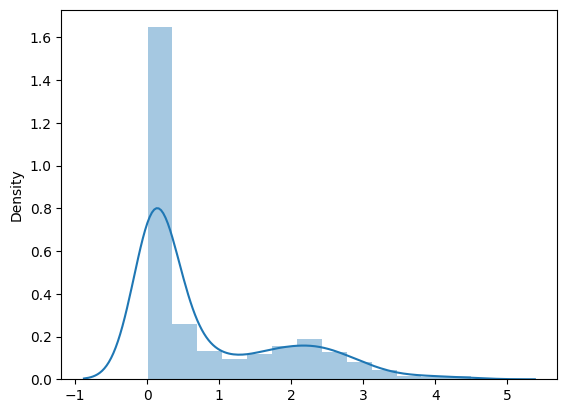

In [ ]:
sns.distplot(x=df.crime_rate, hist = True, kde = True)

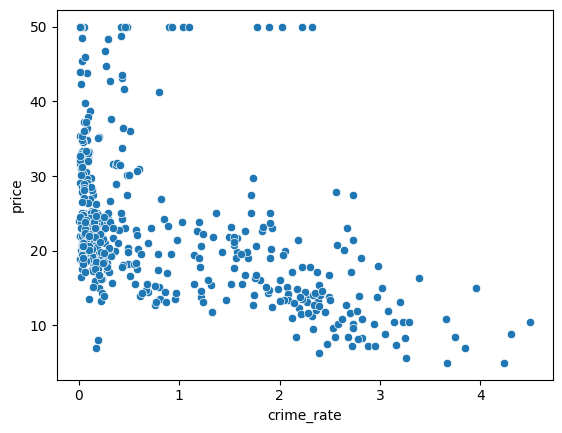

In [ ]:
sns.scatterplot(x=df.crime_rate, y=df.price)
plt.show()

## CONGRATULATIONS!!!!!! ✨


I have successfully cleaned my data


# ACTION 3: Feature Engineering
Handling categorical columns is an important task in data analysis and modeling as categorical variables contain non-numerical values that require special treatment. Categorical variables provide valuable information about the different groups or categories in a dataset.

Categorical variables can be classified into two types:

1.   Nominal Variables: These variables have categories with no inherent order or ranking. Examples include gender (male, female)or city(Abuja, Lagos, Benin).
2.   Ordinal Variables: These variables have categories with a specific order or ranking. Examples include educational level (high school, college, graduate school) or satisfaction level (low, medium, high).

## Data Encoding
Categorical variables need to be encoded into numerical values for analysis or modeling. Some common encoding techniques include:

1.   **One**-**Hot** **Encoding**: This technique creates binary columns for each category, representing the presence or absence of the category in each observation.


*   Dummies


> In the context of pd.get_dummies(), "dummies" refers to these new binary columns that are created. For example, if you have a categorical column named 'Color' with values 'Red', 'Blue', and 'Green', pd.get_dummies() will create three new columns: 'Color_Red', 'Color_Blue', and 'Color_Green'. For each row, one of these new columns will have a value of 1 (or True in newer pandas versions) and the others will have a value of 0 (or False)


In [ ]:
encoded_df = pd.get_dummies(df) #Now with this code we no longer get YES and NO.But rather True and False.
#automatically identifies the categorical columns in your DataFrame (df) and converts them into a numerical format.
#For each unique category in a categorical column, it creates a new binary column.
encoded_df.head() # displays the first few rows of the new DataFrame encoded_df after the one-hot encoding has been applied.

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,4.98,5.480,11.19200,23,0.049347,False,True,False,False,True
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,9.14,7.332,12.17280,42,0.046146,True,False,True,False,False
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,4.03,7.394,46.19856,38,0.045764,True,False,False,False,True
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,2.94,9.268,11.26720,45,0.047151,False,True,True,False,False
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,5.33,8.824,11.28960,55,0.039474,True,False,True,False,False


In [ ]:
encoded_df.shape,df.shape

((506, 21), (506, 18))

2. **Ordinal** **Encoding**: This technique assigns a unique integer value to each category, preserving the ordinal relationship among categories. It is suitable when the categories have an inherent order or rank.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Fill missing values in 'waterbody' with 'None'
df['waterbody'] = df['waterbody'].fillna('None')

# Manually specify the order mapping, including 'None'
order_mapping = [['None', 'River', 'Lake', 'Lake and River']] # This is a crucial part for ordinal encoding. It defines the specific order you want to assign to the categories in the 'waterbody' column. In this case, you've decided that 'None' comes first, followed by 'River', 'Lake', and finally 'Lake and River'. This order will determine the numerical values assigned during encoding.

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping) #fit() learns the categories and their order from the data based on the categories provided during initialization
encoded_data = encoder.fit_transform(df[['waterbody']]) # The output of this is a Numpy array
df['waterbody_encoded'] = encoded_data #selects waterbody column as a Dataframe because fit_transform expects a 2D

In [ ]:
df.waterbody.unique().tolist()

['River', 'Lake', 'Lake and River']

In [ ]:
del df['waterbody']

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,waterbody_encoded
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.19200,23,0.049347,1.0
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,42,0.046146,2.0
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,38,0.045764,1.0
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,45,0.047151,2.0
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,55,0.039474,2.0


3. **Label** **Encoding**: Similar to ordinal encoding, label encoding assigns a unique integer value to each category, but it does not preserve any inherent order. it is suitable when the categories are unordered.


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['airport'])
df['airport'] = encoded_data

df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,waterbody_encoded
0,24.0,0.006300,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,1,5.480,11.19200,23,0.049347,1.0
1,21.6,0.026944,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,0,7.332,12.17280,42,0.046146,2.0
2,34.7,0.026924,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,0,7.394,46.19856,38,0.045764,1.0
3,33.4,0.031857,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,1,9.268,11.26720,45,0.047151,2.0
4,36.2,0.066770,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,0,8.824,11.28960,55,0.039474,2.0


# ACTION 4: Multicollinearity


**Multicollinearity** occurs when two or more independent variables (features) in a regression model are highly correleted with each other. This means one predictor variable can be linearly predicted from the others with a substantial degree of accuracy. *Multicollinearity doesn't necessarily reduce the predictive accuracy of the model as a whole, but it severely impacts the interpretability of its coefficients.*

**Why** **is** **it** **a** **problem**?


*   **Unreliable** **Coefficients**: it becomes difficult for the model to determine the individual effect of each correlated feature on the target variable. The coefficient estimates can become very sensitive to small changes in the data, making them unstable and untrustworthy.
*   **Difficult** **Interpretation**: You can't interpret a coefficient as "the effect of one-unit change in this feature, holding all others constant," because when one feature changes, its correlated partners change with it.

**Solution**

* Remove highly correlated independent variables by looking at the correlation matrix and VIF (Variance Inflation Factor). VIF quantifies how much the variance of the estimated regression coefficient is increased due to multicollinearity. A high VIF for a variable indicates it is highly correlated with other predictor variables.
* Combine correlated variables into a single variable (e.g., create an average or index).
* Use regularization techniques (like Lasso or Ridge regression) that can handle multicollinearity.
* Collect more data, if possible, as multicollinearity can be a sample-specific issue.





**Correlation** is a statistical measure that indicates the extent to which variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.


Examples


Some examples of data that have a high correlation:


*   Your caloric intake and your weight
*   The amount of time you study and your GPA (Me: I'd say debatable)




Other examples of data that have a low correlation (or none at all):


*   A person name and the chances of them commiting violence
*   The colour of a house and how much the building cost




**The** **Correlation** **Co**-**efficient**


Definition


*   A correlation coefficient is a way to put to the relationship.
*   Correlation coefficient have a value between -1 and 1.


*   A "O" means there is no relationship between the variables at all,
*   While -1 or 1 means that there is a perfect negative or positive correlation






Examples


* A correlation coefficient of 0.9 would indicate a strong positive correlation (e.g., the amount of time you study and your GPA).
* A correlation coefficient of -0.8 would indicate a strong negative correlation (e.g., the outside temperature and heating costs).
* A correlation coefficient of 0.1 would indicate a very weak positive correlation (e.g., a person's height and their salary).
* A correlation coefficient of -0.05 would indicate a very weak negative correlation (e.g., the color of a house and its selling price).


**The** **Correlation** **matrix**


Definition


*   A correlation matrix is a table showing correlation coefficients between variables.
*   Each cell in the table shows a correlation between two variables.


*   A correlation matrix is used as a way to summarize data, as input into a more advanced analysis, and as a diagnostic for  advanced analysis






Application


* A correlation coefficient of 0.9 would indicate a strong positive correlation (e.g., the amount of time you study and your GPA).
* A correlation coefficient of -0.8 would indicate a strong negative correlation (e.g., the outside temperature and heating costs).
* A correlation coefficient of 0.1 would indicate a very weak positive correlation (e.g., a person's height and their salary).
* A correlation coefficient of -0.05 would indicate a very weak negative correlation (e.g., the color of a house and its selling price).


<Axes: >

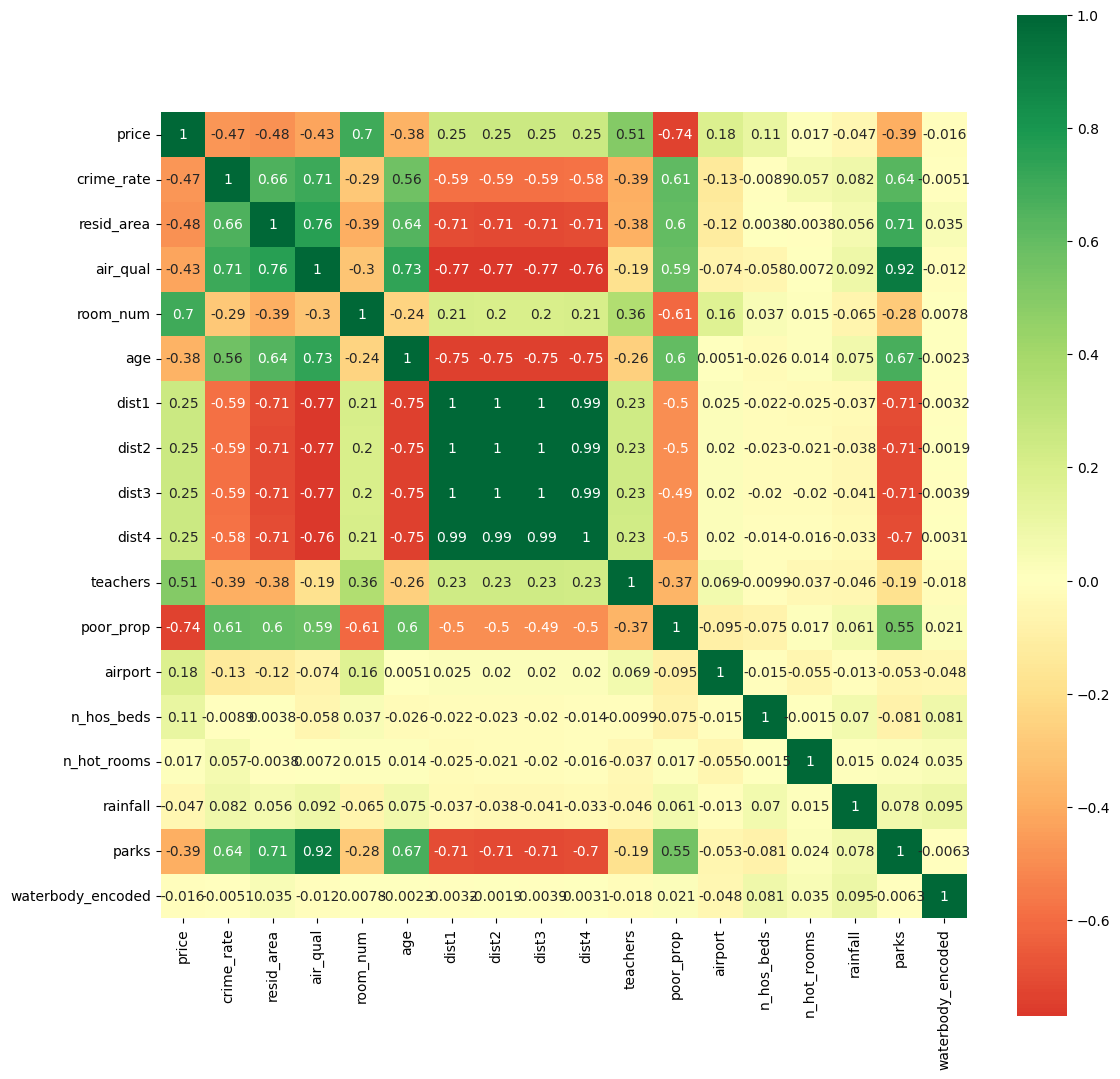

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap

sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)


##Explaining the Heatmap


Here's a breakdown of the lines of code:

*import matplotlib.pyplot as plt:* This line imports the matplotlib.pyplot module, which is a plotting library in Python, and gives it the alias plt for easier use.

*plt.figure(figsize = (13, 13)):* This line creates a new figure for your plot using matplotlib. The figsize parameter sets the size of the figure in inches to 13 inches by 13 inches. This is done to ensure the heatmap is large enough to be readable, especially with many variables.

*sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)*: This is the core line that generates the heatmap using the seaborn library.

*sns.heatmap(...):* This is the function from seaborn used to create heatmaps.


*df.corr():* This calculates the pairwise correlation between all columns in your DataFrame df. The result is a correlation matrix, where each cell contains the correlation coefficient between two columns.

*annot=True:* This parameter tells seaborn to annotate each cell of the heatmap with the correlation coefficient value. This makes it easy to see the exact correlation between variables.

*cmap='RdYlGn':* This sets the colormap for the heatmap. 'RdYlGn' is a common colormap that uses red for negative correlations, yellow/light green for correlations around zero, and green for positive correlations. The intensity of the color indicates the strength of the correlation.

*center=0:* This parameter sets the center of the colormap to 0. This is useful for correlation heatmaps as a correlation of 0 means no linear relationship, and the colors will diverge from the center towards the positive and negative extremes.

*square=True:* This parameter ensures that each cell in the heatmap is square-shaped. This makes the heatmap visually more appealing and easier to interpret.

In summary, this code calculates the correlation matrix of your DataFrame and then visualizes it as a heatmap with annotations and a specific colormap to easily identify the strength and direction of the linear relationships between your variables.

## Still on the Heatmap
Here's what it's telling us:

Each square in the heatmap shows the correlation coefficient between two variables.

The color of the square indicates the strength and direction of the correlation:

**Red or darker shades of red** typically represent a strong positive correlation (as one variable increases, the other tends to increase).

**Blue or darker shades of blue** typically represent a strong negative correlation (as one variable increases, the other tends to decrease).

**Lighter shades or colors closer to the center** (often white or light yellow/green depending on the colormap) indicate a weak or no correlation.

**The diagonal line** from the top left to the bottom right is always a solid color (usually the strongest positive correlation color) because a variable is perfectly correlated with itself (correlation coefficient of 1).

**Symmetry:** The heatmap is symmetrical along the diagonal because the correlation between variable A and variable B is the same as the correlation between variable B and variable A.

By looking at this heatmap, we can quickly identify which pairs of variables have strong positive or negative relationships. This is useful for understanding the data and can help in feature selection for machine learning models. For example, if two independent variables are highly correlated with each other (multicollinearity), we might consider removing one of them to improve model performance. We can also see which variables have the strongest correlation with your target variable which may indicate potential strong predictors.

In [ ]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4


In [ ]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']


In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,waterbody_encoded,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.19200,23,0.049347,1.0,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.17280,42,0.046146,2.0,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,46.19856,38,0.045764,1.0,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.26720,45,0.047151,2.0,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.28960,55,0.039474,2.0,6.0625


<Axes: >

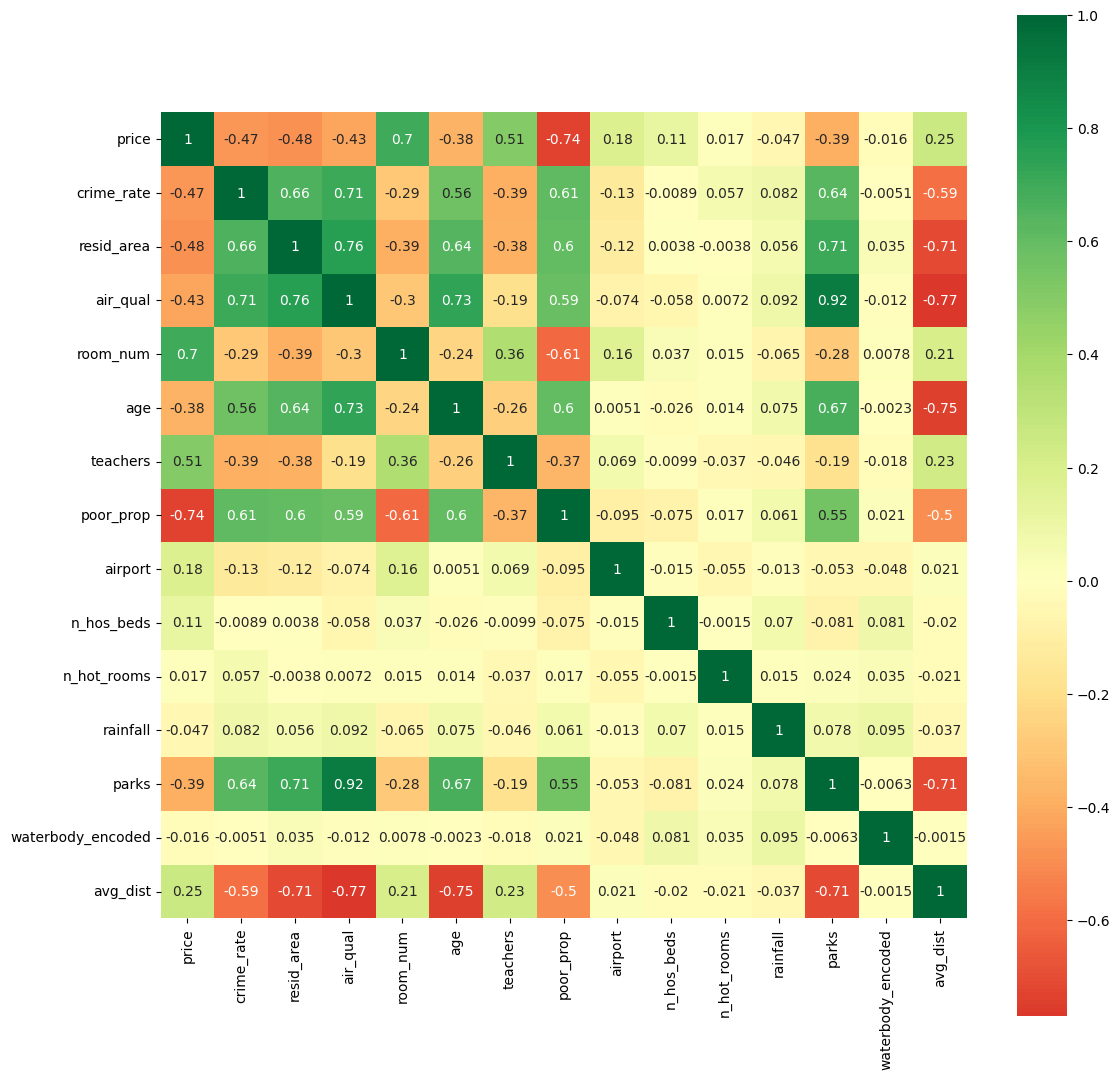

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

In [ ]:
del df['parks'] #the 'parks' column showed a very low correlation with the target variable 'price. See its negative value is -0.047, so low.

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,waterbody_encoded,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.19200,23,1.0,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.17280,42,2.0,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,46.19856,38,1.0,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.26720,45,2.0,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.28960,55,2.0,6.0625


In [ ]:
df.to_csv("Cleaned House Data.csv", index = False) #this code is saving your cleaned and processed data from the DataFrame into a new CSV file, making it available for future use. The default index=False prevents DataFrame index as the first column

In [ ]:
from google.colab import files

files.download('Cleaned House Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ACTION 4: ML Algorithms for Supervised Learning


## Note/Remember that:

Classification and regression are **the** **two** **main** **types** of supervised learning problems

Common Algorithms for machine learning include


*   Classification (*which category does this belong to*?): Logistic regression, Support Vector Machines,Decision Trees, k-NN, Naive Bayes


*   Regression (*How much? or How many?*): Linear regression, decision trees, random forest, SVR


## Regression
Regression  is a statistical modeling technique used to explore the relationship between a dependent variable and one or more independent variables. Regression predicts **a** **continous** **numerical** **value**.

**Questions** **answered** **by** **regression**: *what is the price of this house? How many sales will we have next month? What will the temperature be tommorrow?*

Linear regression is a specific type of regression that assumes a linear relationship between the variables.


**Linear Regression:**
Linear regression aims to model the relationship between a dependent variable (response variable) and one independent variable (predictor variable) through a linear equation of the form

## Y =wx + b,

where **Y** represents the dependent variable,

 X represents the independent variable,

 w is the slope coefficient, and

 b is the y-intercept.

Linear regression assumes that the relationship between the variables is additive, linear, and has constant variance (homoscedasticity). It is suitable for continuous numeric variables and can be used for both prediction and inference.






The goal of linear regression is to estimate the coefficients (w and b)that minimizes the sum of the squared differnces between the observed and predicted values.


It is suitable for continuous numeric variables and can be used for both prediction and inference.


**Univariate Analysis:**


Univariate analysis involves examining the relationship between the dependent and a single independent variable. In the context of linear regression, univariate analysis helps determine if there is a significant linear relationship between the dependent variable and the predictor variable.

Key steps in univariate analysis include data visualization, correlation analysis, and assessing the assumptions of linear regression (linearity, normality, homoscedasticity).



**Multiple** **Linear** **Regression**:


Multiple linear regression extends the concept of linear regression to incoporate multiple independent variables. It allows for modeling the relationship between a dependent variable and multiple predictor variables through a linear equation of the form. Multiple linear regression enables us to evaluate the unique contribution of each predictor variable while controlling for the effects of other variables.



##         Y = b + w1X1 + w2X2+...+wn*Xn           

The coefficients (b, w1,w2,...,wn) are estimated using techniques like ordinary least squares (OLS) to minimize the sum of squared differences between the observed and predicted values.


<Axes: xlabel='room_num', ylabel='price'>

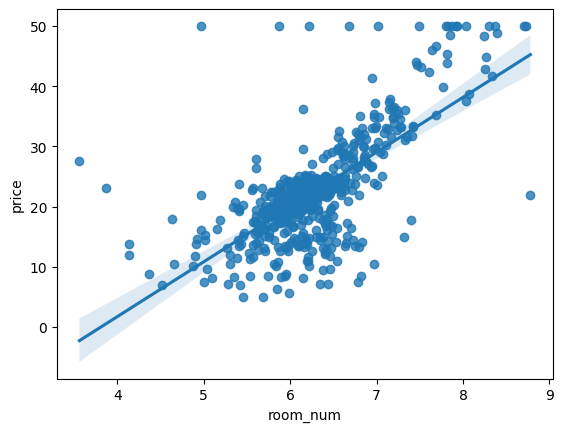

In [ ]:
sns.regplot (x = "room_num", y = "price", data=df)

**Univariate** **analysis** **with** **python**


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y = df['price']
x = df[['room_num']]

In [ ]:
lm2 = LinearRegression() #an empty model object named lm2 (of the LinearRegression Class) is ready to be trained
lm2.fit(x,y) #trains the model using your data. The fit() method then finds the best-fitting line through your data by minimizing difference between the predicted values and the actual values

LinearRegression()

In [ ]:
print(lm2.intercept_, lm2.coef_)

-34.6592431230972 [9.09966966]


The code print(lm2.intercept_, lm2.coef_) is printing the coefficients of the linear regression model lm2 that we just trained.



*   **lm2.intercept_:** This is the y-intercept of the linear regression line. In the equation Y = wx + b, the intercept is b. It represents the predicted value of Y (price) when X (room_num) is zero. While interpreting this value directly might not always be meaningful in a real-world context (as a house can't have 0 rooms), it's a necessary part of the linear equation.


*  **lm2.coef_:** This is the coefficient (or slope) of the independent variable x (room_num). In the equation Y = wx + b, the coefficient is w. It represents the change in the predicted value of Y (price) for a one-unit increase in X (room_num), assuming all other variables are held constant (though in this univariate case, there are no other variables). The output [9.09966966] means that for every additional room, the predicted price of the house increases by approximately 9.1 units (assuming the price is in thousands of dollars, this would be $9,100).

So, this line of code is giving us the key parameters of the linear equation that the model has learned to represent the relationship between the number of rooms and the house price.

## Evaluation Metrics

Machine learning evaluation metrics are used to assess the performance and quality of machine learning models. These metrics help us understand how well our models are performing and provide insights into their strengths and weaknesses.

**Evaluation** **metrics** **for** **regression** **include**:


> R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).




In [ ]:
y_pred1 = lm2.predict(x) #Given the number of rooms in each house in x, what is your best guess for the price of each house?

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_pred1) #r2 tells the % of target value fluctuation that model accounts for

0.4848389736536868

The r2_score function compares the actual values (y) to the predicted values (y_pred1) and returns a single number (the R-squared score) that tells you how well your model's predictions explain the variability in the actual house prices. As you saw in the output of cell tKcvmOjj9UGT, the R-squared score was 0.4848, meaning your model explained about 48.5% of the variation in house prices using only the number of rooms as a predictor.

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,waterbody_encoded,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.19200,23,1.0,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.17280,42,2.0,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,46.19856,38,1.0,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.26720,45,2.0,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.28960,55,2.0,6.0625


### Multiple Linear Regression with Python

In [ ]:
y = df['price']
x = df.drop("price",axis=1) #This is crucial.
#It tells pandas to drop a column (axis 1 refers to columns, while axis 0 refers to rows).
#If you omitted axis=1 or set it to axis=0, pandas would try to drop a row with the index "price", which would likely result in an error.

The above code  is preparing your data for a machine learning model, specifically for Multiple Linear Regression. In supervised learning, you typically need to separate your dataset into two parts: the target variable (what you want to predict) and the features (the variables you will use to make the prediction).

In essence, this code is correctly splitting your data into the target variable (y) and the features (x), which is a standard first step before training a regression model.

In [ ]:
lr = LinearRegression() #This line creates an instance (or object) of the LinearRegression class.
# At this point, lr is an empty linear regression model.
# It hasn't been trained on any data yet, and it doesn't know the relationship between your features (x) and your target variable (y).


In [ ]:
x = x.dropna() #dropna() in pandas removes columns with missing values
y = y[x.index] #aligns y with the remaining rows in x.
#This ensures that your feature data (x) and target data (y) have the same rows and are aligned correctly for training the model.
lr.fit(x,y) #When I put only this line of code it said there were still some missing values so the first line of code above took care of that.
# lr.fit(x,y)) will take the lr object and train it using your prepared data.

LinearRegression()

In [ ]:
lr.intercept_, lr.coef_ #Each coefficient represents the change in the predicted value of Y (price) for a one-unit increase in its corresponding independent variable, assuming all other independent variables are held constant.

(np.float64(-6.67166908831053),
 array([ 1.97802567e-02, -4.06110145e-02, -1.60885060e+01,  4.00300868e+00,
        -4.40495236e-03,  1.01395220e+00, -5.75016147e-01,  1.17105151e+00,
         3.40523671e-01,  9.68761390e-02,  1.43277989e-02, -1.34128907e-01,
        -1.20709035e+00]))

The output (np.float64(-6.67166908831053), array([ 1.97802567e-02, -4.06110145e-02, -1.60885060e+01, 4.00300868e+00, -4.40495236e-03, 1.01395220e+00, -5.75016147e-01, 1.17105151e+00, 3.40523671e-01, 9.68761390e-02, 1.43277989e-02, -1.34128907e-01, -1.20709035e+00])) shows the intercept and the coefficients of your multiple linear regression model.

Intercept (-6.67166908831053): This is the estimated average price of a house when all the independent variables (features) are zero. In a real-world scenario, it's often not directly interpretable because it's unlikely to have a house with all features equal to zero. However, it's a necessary part of the linear equation that defines the relationship between the features and the price.

Coefficients (the array of numbers): Each number in the array corresponds to a coefficient for each of the independent variables in your model, in the order they appear in your x DataFrame. These coefficients represent the estimated change in the house price for a one-unit increase in the corresponding feature, assuming all other features are held constant.

For example, the first coefficient 1.97802567e-02 (which is approximately 0.0198) is the coefficient for crime_rate. This means that for every one-unit increase in the crime rate (after the log transformation), the estimated house price increases by approximately 0.0198 units (assuming the price is in thousands of dollars, this would be about $19.80). Similarly, you can interpret the other coefficients in relation to their corresponding features. The sign of the coefficient indicates the direction of the relationship (positive means price increases with the feature, negative means price decreases).

In [ ]:
y_pred = lr.predict(x)

In [ ]:
from sklearn.metrics import r2_score #the R-squared score is also known as the coefficient of determination.
r2_score(y, y_pred) #Now accuracy has moved up to 72% because other facets of the data is now considered as well

0.7200470452209979

The R-squared score is a key metric used to evaluate the performance of regression models (like the linear regression model you've built). It provides a measure of how well your model's predictions fit the actual data.

**Interpretation:** The R-squared score ranges from 0 to 1 (or 0% to 100%).
An R-squared of 0 means that your model does not explain any of the variability in the dependent variable (price) around its mean. In other words, the model is no better than simply predicting the average price for all houses.

An R-squared of 1 means that your model explains 100% of the variability in the dependent variable. This would indicate a perfect fit, where your model's predictions exactly match the actual prices.

An R-squared value between 0 and 1 indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. For example, an R-squared of 0.72 (like you got in cell MUOiqvKeIkby) means that your model explains 72% of the variation in house prices.

So, from sklearn.metrics import r2_score is simply making the r2_score function available for you to use in your code to calculate how well your linear regression model is performing.

In [ ]:
df.to_csv("Cleared House Data.csv", index = False)

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.linear_model import LinearRegression #Replace with your actual model

model = lr

x_train = x

#Create a dictionary to store the input widgets
input_widgets = {}

#Create text input widgets for each feature in x_train
for feature in x_train.columns:
  input_widgets[feature] = widgets.Text(description=feature + ':')
prediction = 0
#Create a prediction function
def make_prediction(b):
  input_features = {}

  #Retrieve the input values from the widgets
  for feature, widget in input_widgets.items():
    input_features[feature] = widget.value

  #Prepare the input data as a dictionary
  input_data = {feature: [value] for feature, value in input_features.items()}

  #Create a Dataframe from the input data
  input_df = pd.DataFrame(input_data)

  #Make a prediction
  prediction = model.predict(input_df)[0]  # Get the first element from the prediction array

  # Set prediction to zero if it's negative
  if prediction < 0:
    prediction = 0

  #Display the prediction
  with output:
    print(f"Predicted Price: {prediction}")

#Create a button for prediction
predict_button = widgets.Button(description='Predict', button_style= "danger")
predict_button.on_click(make_prediction)
output = widgets.Output()

#Display the widgets and prediction button
input_widgets_list = list(input_widgets.values())
input_widgets_list.append(predict_button)
input_widgets_list.append(output)
display(*input_widgets_list)

Text(value='', description='crime_rate:')

Text(value='', description='resid_area:')

Text(value='', description='air_qual:')

Text(value='', description='room_num:')

Text(value='', description='age:')

Text(value='', description='teachers:')

Text(value='', description='poor_prop:')

Text(value='', description='airport:')

Text(value='', description='n_hos_beds:')

Text(value='', description='n_hot_rooms:')

Text(value='', description='rainfall:')

Text(value='', description='waterbody_encoded:')

Text(value='', description='avg_dist:')

Button(button_style='danger', description='Predict', style=ButtonStyle())

Output()

Now that we have an interactive way to make predictions, we could explore:

Evaluating the model further: While we have the R-squared score, we could look at other evaluation metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE) to get a more complete picture of our model's performance.

Visualizing the model's performance: creating plots to visualize the predicted prices against the actual prices to see how well the model is fitting the data.

Other regression models: We could try different regression algorithms (e.g., Ridge, Lasso, or even more complex models) to see if these can improve prediction accuracy.

Feature Engineering: One could revisit the feature engineering steps to see if creating new features or transforming existing ones differently could lead to better model performance.

Cross-validation: To get a more robust estimate of this model's performance, one could implement cross-validation.


## Evaluation Metrics Cont...

Machine learning evaluation metrics are used to assess the performance and quality of machine learning models. These metrics help us understand how well our models are performing and provide insights into their strengths and weaknesses.

**Evaluation** **metrics** **for** **classification** include:* Accuracy, Precision, Recall, F1 Score, ROC AUC.*

**Questions** **answered** **by** **classifacation**: *Is this email spam or not spam? Is this tumor malignant or benign? What animal is this image (cat, dog, bird)?*

Let's explore some commonly used evaluation metrics along with their formulas and examples:

1. **Accuracy**: Accuracy measures the proportion of correct predictions compared to the total number of predictions. It is suitable for balanced datasets where the classes are equally represented. However, it can be misleading when dealing with imbalanced datasets.
- Formula: $$\frac{TP + TN} {TP + TN + FP + FN}$$

        TP: True Positives, TN: True Negatives, FP: False Positives, FN: False Negatives

- Example:

| Actual   | Predicted |
|----------|-----------|
| Yes      | Yes       |
| No       | No        |
| Yes      | No        |
| Yes      | Yes       |
| Yes      | Yes       |

 $Accuracy =\frac{3 + 1} {5} = 0.8$


For instance:

In a binary classification system where man is the positive case (1) and woman is the negative case (0), the true/false positive/negative conditions are as follows:


*   True Positive (TP): The actual sex is man (1), and the model correctly predicts man (1). The man is correctly identified.


*   True Negative (TN): The actual sex is woman (0), and the model correctly predicts woman (0). The woman is correctly identified.
*   False Positive (FP): The actual sex is woman (0), but the model incorrectly predicts man (1). A woman is incorrectly identified as a man (also known as a Type I error or false alarm).


*   False Negative (FN): The actual sex is man (1), but the model incorrectly predicts woman (0). A man is incorrectly identified as a woman (also known as a Type II error or missed detection).  


2. **Precision and Recall**: Precision and recall are metrics used in binary classification problems, particularly when the classes are imbalanced. Precision measures the proportion of correctly predicted positive instances out of all predicted positives. Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positives.

**Precision Formula**: $$\frac{TP}{TP + FP}$$
**Recall Formula:** $$\frac{TP}{TP + FN}$$
**Example:**


|Actual | Predicted|
|-------|-------|
|Yes|Yes|
|No|	Yes|
|Yes|	No|
|Yes|	Yes|
|No|	No|

$$Precision = \frac{2}{2 + 1} = 0.67$$
$$Recall = \frac{2}{2 + 1} = 0.67$$


3. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when we want to consider both metrics together.

**Formula**: $$ \frac{2 \times Precision \times Recall}{Precision + Recall} $$
Example:
$$F1 Score =  \frac {2 \times 0.67 \times 0.67 }{0.67 + 0.67} = 0.67$$

4. **Mean Squared Error (MSE)**: MSE is commonly used for regression problems. It measures the average squared difference between the predicted and true values. A lower MSE indicates better performance.

**Formula** : $$ \frac{1}{n} \times Σ(y_true - y_pred)^2$$
**Example** :
|y_true|	y_pred|
|-------|-------|
|2|	1.5|
|3|	2.0|
|5|	4.5|
|4|	3.5|
|6|	5.5|

$$MSE = \frac{1}{5} \times ((2 - 1.5)^2 + (3 - 2.0)^2 + (5 - 4.5)^2 + (4 - 3.5)^2 + (6 - 5.5)^2) = 0.25$$
5. **R-squared (Coefficient of Determination)**: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating a perfect fit and 0 indicating no linear relationship.

**Formula**: $ 1 - \frac{SSR}{SST}$

*SSR: Sum of Squared Residuals, SST: Total Sum of Squares*

**Example**:
$$R-squared = 1 - \frac{SSR}{SST} = 1 - \frac{0.25}{10} = 0.975$$

6. **ROC-AUC**: Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) are used for binary classification problems. ROC-AUC evaluates the model's ability to distinguish between classes by plotting the true positive rate against the false positive rate.

*ROC Curve*: Plots True Positive Rate (TPR) against False Positive Rate (FPR)

*AUC*: Area Under the ROC Curve

7. **Log Loss (Logistic Loss)**: Log loss is commonly used for probabilistic classification problems. It measures the logarithm of the likelihood of the predicted probabilities matching the true labels. A lower log loss indicates better calibration of probabilities.

**Formula**: $$-\frac{1}{n} \times Σ(y_true \times log(y_pred) + (1 - y_true) \times log(1 - y_pred))$$

8. **Confusion Matrix**: A confusion matrix provides a comprehensive summary of the model's performance, especially in multi-class classification problems. It displays the counts of true positives, true negatives, false positives, and false negatives.

Provides counts of *True Positives (TP)*, *True Negatives (TN)*, *False Positives (FP)*, and *False Negatives (FN)*

**Example**: See the table with counts of each category.

It' s important to choose the appropriate evaluation metric based on the specific problem and requirements. Different metrics provide different insights into the model's performance, and it's often recommended to consider multiple metrics together to gain a comprehensive understanding.

**A** **Personal** **Question**

Can we use Prediction and recall for the House Price problem?

**No**. Because House Price is not a binary classification problem, where we have exact values that we are looking at. If we had a problem where maybe we expect: Apple, Orange, and Bananas, then we can. But the House Price model is not that kind, its a regression problem.

Note that a multiclass classification is **not** one where we want to know if its apple or not, say. But we want to know if its apple, or cucumber, or banana

## Train-Test Split in Machine Learning

Train-test split is a common technique used in machine learning to evaluate the performance of a model on unseen data. It involves splitting the available dataset into two independent subsets: one for training the model (the training set) and the other for evaluating the model's performance (the test set). The train-test split helps assess how well the model generalizes to new, unseen data.

**Training** **Set**: Majority of our data (typically 70-80%)

**Test** **Set**: separate portion of data to evaluate performance (typically 20-30%)

we'll be using another library from *SKLearn*


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#Load the dataset:
df = pd.read_csv("/content/Cleaned House Data.csv",)

In [ ]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,waterbody_encoded,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.19200,23,1.0,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.17280,42,2.0,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,46.19856,38,1.0,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.26720,45,2.0,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.28960,55,2.0,6.0625


In [ ]:
X = df.drop("price", axis=1) #we drop price because it's our target variable.
#If we dont the model will end up performing excellently until new data comes in.
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#random state 42 is by default the degree of randomness in selecting data for training/testing.

In this example, we are splitting the data into a training set (80% of the data) and a test set (20% of the data). The random_state parameter ensures reproducibility of the split.

In [ ]:
df.shape

(506, 14)

In [ ]:
X_train.shape

(404, 13)

In [ ]:
X_test.shape

(102, 13)

Train-test split is crucial to assess the model's performance on unseen data and avoid overfitting. The model is trained on the training set and then evaluated on the test set to measure its ability to generalize. It helps identify potential issues such as underfitting or overfitting.

It's important to note that the train-test split should be representative of the original data to ensure reliable evaluation. The choice of the test set size depends on the dataset size, available data, and specific requirements of the problem at hand.


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.7297287035436247

## Pitfalls in Machine Learning

### Overfitting and Underfitting

In machine learning, overfitting and underfitting are two common problems that occur when training models. Understanding these concepts is crucial for building robust and accurate machine learning models. Let's take a closer look at each:

### 1. Overfitting:

Overfitting occurs when a model performs exceptionally well on the training data but fails to generalize well on new, unseen data. It happens when the model becomes too complex or overly flexible, effectively "memorizing" the training data instead of learning the underlying patterns. Key characteristics of overfitting include:

- The model shows low training error but high test error.
- The model captures noise and irrelevant details in the training data.
- The model may have excessive complexity, such as having too many features or high polynomial degrees.

Remedies for overfitting:

- Increase the size of the training dataset.
- Reduce the complexity of the model, such as by decreasing the number of features or applying feature selection techniques.
- Regularize the model using techniques like L1 or L2 regularization.
- Use cross-validation for hyperparameter tuning.
### 2. Underfitting:
Underfitting occurs when a model is too simple or inflexible to capture the underlying patterns in the training data. It fails to learn the relationships between the features and the target variable, resulting in poor performance on both the training and test data. Key characteristics of underfitting include:

- The model shows high training error and high test error.
- The model is too simplistic to capture the complexity of the data.
- The model may have insufficient features or inadequate training time.

Remedies for underfitting:

- Increase the complexity of the model, such as by adding more features or increasing the model's capacity.
- Perform feature engineering to extract more meaningful features from the data.
- Increase the training time or adjust the learning rate for iterative algorithms.

Balancing between overfitting and underfitting is a crucial aspect of model training. The goal is to find the right level of complexity that allows the model to generalize well to new, unseen data. Techniques like *cross-validation, regularization, and hyperparameter tuning* play important roles in mitigating overfitting and underfitting.

It's essential to monitor the model's performance on both the training and test data and make adjustments accordingly. Regular evaluation and fine-tuning of the model help strike the right balance between complexity and generalization, leading to more accurate and reliable predictions.

In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.7297287035436247

In [ ]:
r2_score(y_test, y_test_pred)

0.6562759614721015

## Feature Selection
Feature selection is an important step in machine learning and data analysis that involves selecting a subset of relevant features from the original set of available features. It aims to improve model performance, reduce computational complexity, and enhance interpretability by focusing on the most informative and influential features. Feature selection helps mitigate the curse of dimensionality and can lead to more accurate and efficient models.
Subset and shrinkage methods are two common approaches to feature selection. Let's take a closer look at each:

### 1.  Subset Selection Methods:
Subset selection methods aim to find the best subset of features that maximizes the model's performance. There are two main types of subset selection methods:

- Forward Selection: This method starts with an empty set of features and iteratively adds the most significant feature that improves the model's performance the most until a stopping criterion is met.
- Backward Elimination: This method starts with the full set of features and iteratively removes the least significant feature that has the least impact on the model's performance until a stopping criterion is met.

Subset selection methods evaluate the performance of different feature subsets using metrics like cross-validation error or information criteria. They can be computationally expensive, especially for large feature sets, but they provide an optimal subset of features based on the evaluation criterion.

### 2. Shrinkage Methods:
Shrinkage methods, also known as regularization methods, add a penalty term to the objective function during model training. These methods encourage sparse solutions, effectively shrinking less important feature coefficients towards zero. Two popular shrinkage methods are:

- Lasso Regression: Lasso regression applies L1 regularization, resulting in sparse solutions where some feature coefficients become exactly zero. It automatically performs feature selection by effectively excluding irrelevant features from the model.
- Ridge Regression: Ridge regression applies L2 regularization, which reduces the magnitude of feature coefficients without excluding any feature entirely. While ridge regression does not perform explicit feature selection, it can still reduce the impact of less important features.

Shrinkage methods provide a trade-off between model complexity and overfitting. They can effectively handle high-dimensional datasets and multicollinearity by reducing the impact of less relevant features.



In [ ]:
# Get the feature names
feature_names = X_train.columns  # Replace <your_feature_names> with the actual feature names from your dataset

# Get the coefficients
coefficients = lr.coef_

# Print feature names and coefficients
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}:\t\t\t {coef}")

crime_rate:			 -0.4122903941227206
resid_area:			 -0.011760968039762343
air_qual:			 -14.660165120333186
room_num:			 4.490408174462085
age:			 -0.008776672484527404
teachers:			 0.9315984844906366
poor_prop:			 -0.5678486161246687
airport:			 1.1186200387080352
n_hos_beds:			 0.3102162695225059
n_hot_rooms:			 0.09116408056076648
rainfall:			 0.025153405410880056
waterbody_encoded:			 0.0027006339427345675
avg_dist:			 -1.261792310835591


In [ ]:
selected_features = [feature for feature, coef in zip(feature_names, coefficients) if coef > 0.5 or coef < -0.5]

In [ ]:
selected_features


['air_qual', 'room_num', 'teachers', 'poor_prop', 'airport', 'avg_dist']

In [ ]:
X_selected = X_train[selected_features]


In [ ]:
reg_model_selected = LinearRegression()

In [ ]:
reg_model_selected.fit(X_selected, y_train)

LinearRegression()

In [ ]:
y_selected_pred = reg_model_selected.predict(X_selected)

In [ ]:
r2_score(y_train, y_pred)

0.7297287035436247

In [ ]:
r2_score(y_train, y_selected_pred)

0.7246273222575257

In [ ]:
y_test_selected_pred = reg_model_selected.predict(X_test[selected_features])

In [ ]:
r2_score(y_test, y_test_pred)

0.6562759614721015

In [ ]:
r2_score(y_test, y_test_selected_pred)

0.6621034665903334

Subset selection and shrinkage methods offer different approaches to feature selection, each with its own advantages and considerations. The choice between them depends on the specific problem, the size of the feature set, and the desired balance between model complexity and interpretability. Experimentation and evaluation of different feature selection methods are important to identify the most relevant subset of features for a given problem.

## Other Regression Models

Linear regression is a widely used regression model, but there are several other regression models that can be applied to different types of data and scenarios. Here are a few examples:

#### 1. Ridge Regression:
Ridge regression is a regularization technique that adds an L2 penalty term to the linear regression objective function. The penalty term is the sum of the squared values of the model's coefficients. It helps reduce overfitting by shrinking the coefficients only very close to zero. Ridge regression is particularly useful when dealing with multicollinearity in the data.

#### 2. Lasso Regression:
Lasso regression is another regularization technique that adds an L1 penalty term to the linear regression objective function. The penalty term is the sum of the absolute values of the model's coefficients. It encourages sparsity by setting some coefficients to exactly zero, effectively performing feature selection. Lasso regression is helpful when you want to identify the most relevant features for prediction.

#### 3. ElasticNet Regression:
ElasticNet regression combines both L1 and L2 regularization terms in the linear regression objective function. It offers a balance between the feature selection capability of Lasso regression and the coefficient shrinkage of Ridge regression. ElasticNet regression is useful when dealing with high-dimensional datasets and multicollinearity.

#### 4. Decision Tree Regression:
Decision tree regression builds a regression model by recursively partitioning the data based on feature values. It predicts the target variable based on the average target value of the training instances within each leaf node. Decision tree regression can capture complex relationships and handle both numerical and categorical features.

#### 5. Random Forest Regression:
Random forest regression is an ensemble method that combines multiple decision trees to make predictions. It improves the predictive accuracy and handles overfitting by averaging the predictions of multiple trees. Random forest regression is robust, can handle high-dimensional data, and provides feature importance rankings.


These are just a few examples of regression models beyond linear regression. Each model has its own strengths and assumptions, and the choice of model depends on the specific problem, the nature of the data, and the desired trade-offs between accuracy, interpretability, and computational complexity. It's important to understand the characteristics of different regression models and experiment with them to find the most suitable one for your specific task.




<center><h1>Ridge Regression:</h1></center>

The code syntax used to write "Ridge Regression" above, is a snippet of HTML (HyperText Markup Language) used for defining a primary heading and horizontally centering it within the web page

In [ ]:
from sklearn.linear_model import Ridge

# Train the ridge regression model
ridge_reg = Ridge(alpha=0.5)  # Specify the regularization strength (alpha)
ridge_reg.fit(X_train, y_train)


Ridge(alpha=0.5)

In [ ]:
y_ridge = ridge_reg.predict(X_train)
y_test_ridge = ridge_reg.predict(X_test)


In [ ]:
r2_score(y_train, y_ridge)

0.7291010560251879

In [ ]:
r2_score(y_test,y_test_ridge)

0.6537086256693889

# Lasso Regression:

In [ ]:
from sklearn.linear_model import Lasso

# Train the lasso regression model
lasso_reg = Lasso(alpha=0.1)  # Specify the regularization strength (alpha)
lasso_reg.fit(X_train, y_train)


Lasso(alpha=0.1)

In [ ]:
y_lasso = lasso_reg.predict(X_train)
y_test_lasso = lasso_reg.predict(X_test)


In [ ]:
r2_score(y_train, y_lasso)

0.7208862803476719

In [ ]:
r2_score(y_test, y_test_lasso)

0.6491466949197832

# ElasticNet Regression:

In [ ]:
from sklearn.linear_model import ElasticNet

# Assuming X and y are your feature matrix and target variable, respectively

# Train the elastic net regression model
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  # Specify the regularization strengths (alpha, l1_ratio)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [ ]:
y_elast = elastic_net.predict(X_train)
y_test_elast = elastic_net.predict(X_test)

In [ ]:
r2_score(y_train, y_elast)


0.6936632756147896

In [ ]:
r2_score(y_test, y_test_elast)


0.6648498555643074

# Decision Tree Regression:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Assuming X and y are your feature matrix and target variable, respectively

# Train the decision tree regression model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

# Logistic Regression

&nbsp;&nbsp;&nbsp;&nbsp;Logistic regression is a popular machine learning algorithm used for binary classification tasks. Unlike linear regression, which is suitable for continuous target variables, logistic regression predicts the probability of an instance belonging to a specific class. This note provides an overview of logistic regression, its advantages, limitations, key concepts, and evaluation metrics.

The code **&nbsp;** is an HTML entity that stands for "non-breaking space". It was used in the text block above.

### Understanding Binary Classification
Binary classification involves predicting one of two possible outcomes: "yes" or "no," "true" or "false," or simply 0 and 1. Logistic regression is specifically designed for such problems, where the dependent variable is categorical.

### Logistic Regression Intuition
Logistic regression builds upon the concept of linear regression but introduces a nonlinear transformation to restrict the output to a range between 0 and 1. This is achieved using the logistic function, also known as the sigmoid function. The sigmoid function maps any real-valued number to a value between 0 and 1.

The equation for logistic regression can be represented as:

## Pause

To know if a problem requires logistic regression we need to Think OUTPUT. For instance when asking who should recieve a loan or who shouldn't. We do not expect decimal answers (something like 3.567...). We want Yes/No (as in 1 or 0).


## Pause

###Activation Functions in neural networks

Activation functions are important because they:

**Introduce** **non**-**linearity**: Real-world data is often non-linear. Activation functions enable neural networks to model these complex relationships by introducing non-linear transformations.

**Enable** **complex** **learning**: They allow the network to learn and recognize complex patterns in data, which is crucial for tasks like object detection, speech recognition, and natural language processing.

**Determine** **neuron** **output**: They act as a gatekeeper, deciding if a neuron's input is relevant and how strongly its signal should be passed to the next layer.

**Facilitate** **backpropagation**: By providing gradients, activation functions make backpropagation possible, which is how neural networks learn from their errors to update their weight.

###Common Types

**Sigmoid**: A smooth, S-shaped function that squashes values into a range between 0 and 1. It was historically popular but can suffer from the vanishing gradient problem.

**ReLU** (Rectified Linear Unit): Outputs the input directly if it is positive and zero otherwise. It is computationally efficient and helps mitigate the vanishing gradient problem.

**Tanh** (Hyperbolic Tangent): Similar to sigmoid but squashes values between -1 and 1, often leading to faster convergence compared to sigmoid.

**Softmax**: Typically used in the output layer for multi-class classification, it converts a vector of values into a probability distribution where the sum of all values is 1.

**Leaky ReLU**: A variation of ReLU that allows a small, non-zero gradient when the unit is not active, helping to address the "dying ReLU" problem.

**ELU** (Exponential Linear Unit): Similar to ReLU but can produce negative outputs, which helps with learning, though it is computationally more expensive

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("loan-train.csv")

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: xlabel='Gender', ylabel='count'>

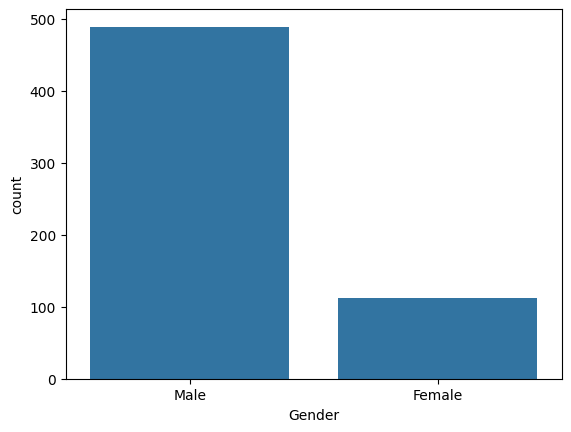

In [ ]:
sns.countplot(x=data.Gender)

<Axes: xlabel='Dependents', ylabel='count'>

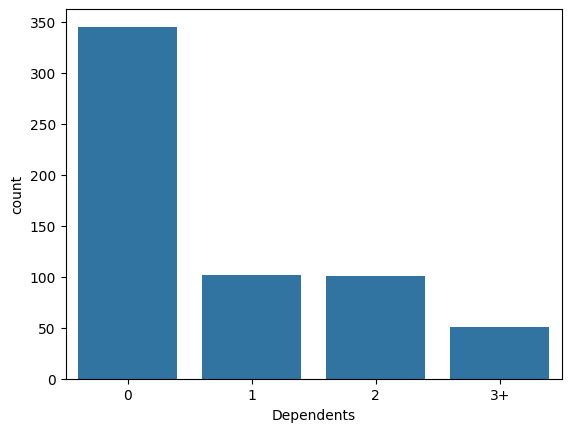

In [ ]:
sns.countplot(x =data["Dependents"])

<Axes: xlabel='Married', ylabel='count'>

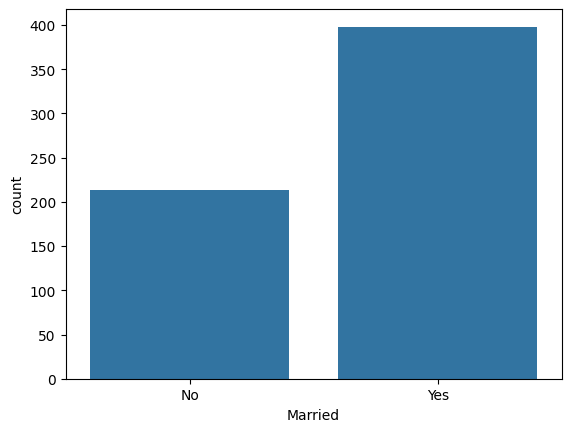

In [ ]:
sns.countplot(x =data["Married"])

<Axes: xlabel='Self_Employed', ylabel='count'>

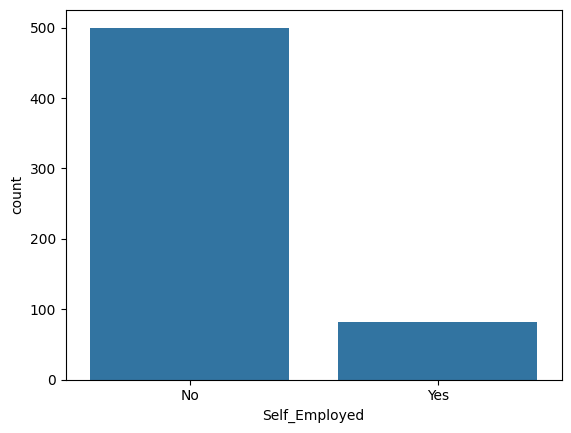

In [ ]:
sns.countplot(x =data["Self_Employed"])

In [ ]:
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data["LoanAmount"] =data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Loan_Amount_Term"] =data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())
data["Credit_History"] =data["Credit_History"].fillna(data["Credit_History"].mean())


<Axes: xlabel='LoanAmount'>

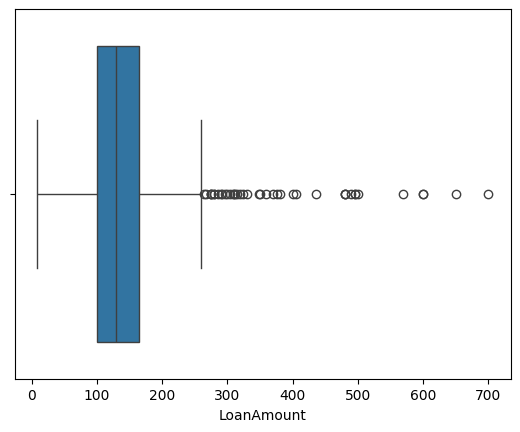

In [ ]:
sns.boxplot(x = data["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term'>

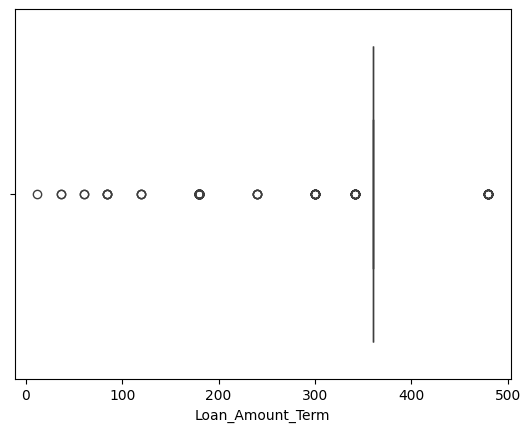

In [ ]:
sns.boxplot(x = data["Loan_Amount_Term"]) #majority is less than 400. Only one is close to 500.

## Pause
Scatter plots and box plots do not perform the same function, though both are used for data visualization. They each serve different purposes and highlight different aspects of data:

**Scatter** **Plot**: A scatter plot displays individual data points on a two-dimensional graph. It is primarily used to observe and show relationships between two quantitative variables. Each dot represents an observation, and its position on the x and y axes corresponds to the values of the two variables. Scatter plots are excellent for identifying correlations, clusters, outliers, and patterns (e.g., linear, non-linear relationships).

**Box** **Plot** (or Box-and-Whisker Plot): A box plot is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It's often used to compare the distributions of a quantitative variable across different categories or groups. Box plots are good for showing central tendency, variability, skewness, and potential outliers in a dataset, but they do not show individual data points or direct relationships between two different variables in the same way a scatter plot does.

If we wanted to see how LoanAmount relates to ApplicantIncome, for example, a scatter plot would be appropriate. Since the goal was *to understand the individual distributions of LoanAmount and Loan_Amount_Term, box plots were the right choice*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data['Loan_Status'].unique().tolist()

['Y', 'N']

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
encoder = LabelEncoder()

data['Gender'] = encoder.fit_transform(data['Gender'])

In [ ]:
order_mapping = [['No', 'Yes']]
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(data[['Married']])
data['Married'] = encoded_data

In [ ]:
order_map = [['0', '1', '2', '3+']]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Dependents']])
data['Dependents'] = encoded_data

In [ ]:
order_map = [['Not Graduate','Graduate']]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Education']])
data['Education'] = encoded_data

In [ ]:
order_map = [['Rural', 'Semiurban', 'Urban']]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Property_Area']])
data['Property_Area'] = encoded_data

In [ ]:
order_map = [['Y', 'N'][::-1]]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Loan_Status']])
data['Loan_Status'] = encoded_data

In [ ]:

order_map = [['No', 'Yes']]
encoder = OrdinalEncoder(categories=order_map)
encoded_data = encoder.fit_transform(data[['Self_Employed']])
data['Self_Employed'] = encoded_data

In [ ]:
data["Self_Employed"].unique()

array([0., 1.])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 62.5+ KB


In [ ]:
data.head()

In [ ]:
del data['Loan_ID']

<Axes: >

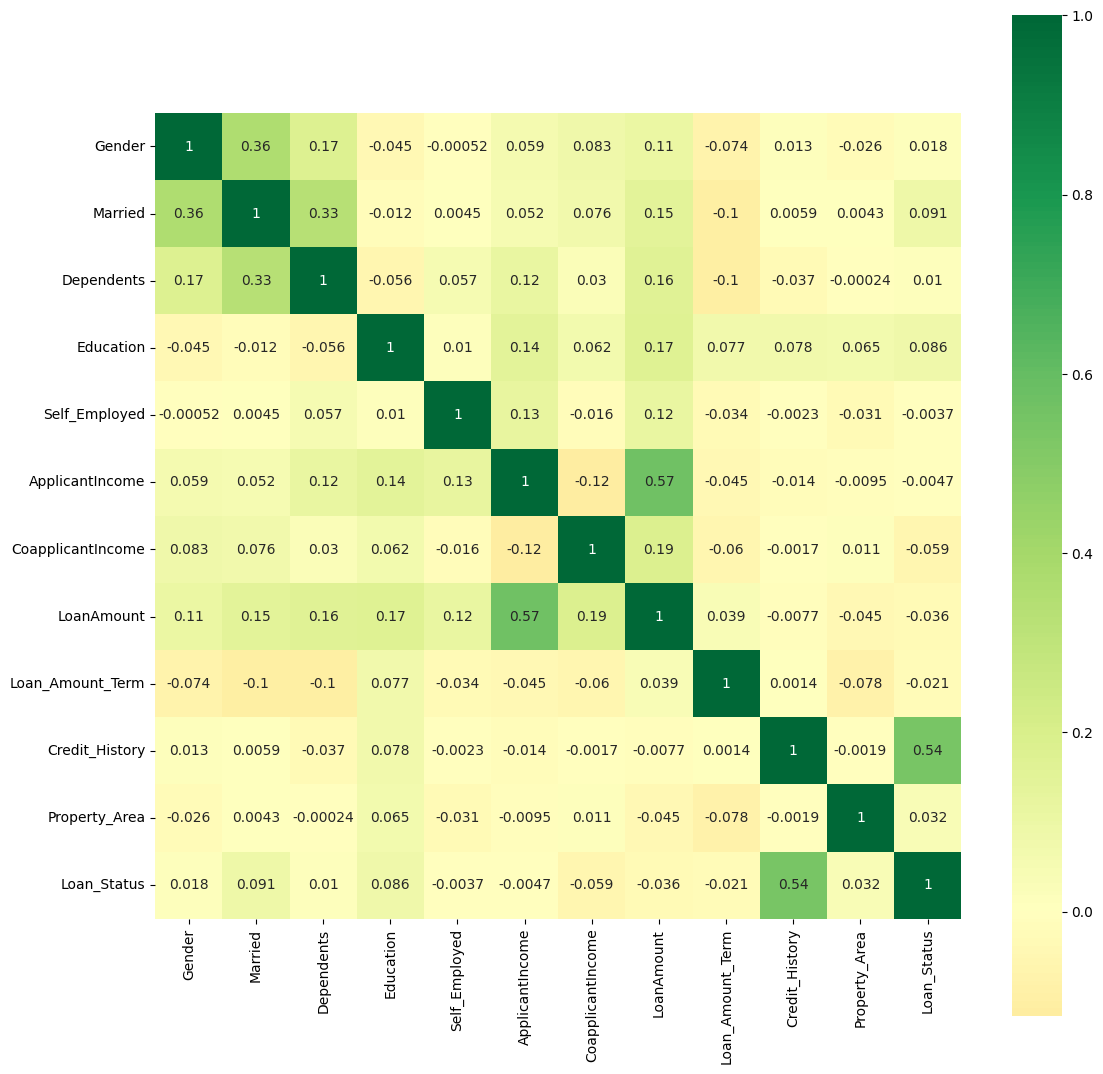

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', center=0, square=True)


In [ ]:
X = data.drop("Loan_Status", axis=1) #X is data without loan status
y = data['Loan_Status'] #y is data with loan status

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 52.9 KB


In [ ]:
from sklearn.linear_model import LogisticRegression
# Creating an instance of the Logistic Regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Making predictions on the test data
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluating the model's accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.8167006109979633


In [ ]:
from sklearn.metrics import accuracy_score
# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7886178861788617


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

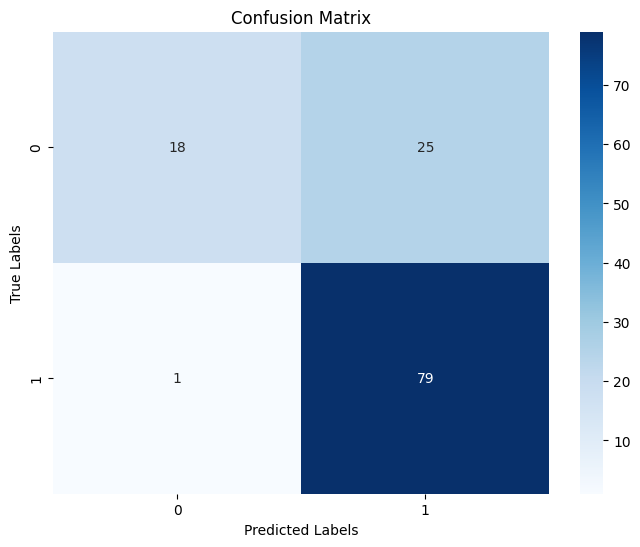

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()

## Lets dig deeper

The confusion matrix cm = array([[18, 25], [1, 79]]) represents the performance of your logistic regression model on the test data. To interpret it, we need to recall how the Loan_Status was encoded:

'Y' (Loan Approved) was encoded as 1.

'N' (Loan Not Approved) was encoded as 0.

In a confusion matrix generated by sklearn, the rows represent the true labels, and the columns represent the predicted labels. So, in this context:


###True Positive (TP): cm[1,1] = 79

These are the cases where the actual loan status was 'Y' (Approved), and the model correctly predicted 'Y' (Approved). (79 instances)

###True Negative (TN): cm[0,0] = 18

These are the cases where the actual loan status was 'N' (Not Approved), and the model correctly predicted 'N' (Not Approved). (18 instances)

###False Positive (FP): cm[0,1] = 25

These are the cases where the actual loan status was 'N' (Not Approved), but the model incorrectly predicted 'Y' (Approved). This is a Type I error. (25 instances)

###False Negative (FN): cm[1,0] = 1

These are the cases where the actual loan status was 'Y' (Approved), but the model incorrectly predicted 'N' (Not Approved). This is a Type II error. (1 instance)

###What the output means in this context:

Your model correctly identified 79 applicants who would have their loans approved (True Positives) and 18 applicants who would not (True Negatives). However, it made 25 mistakes by predicting approval for applicants who would actually be rejected (False Positives). Conversely, it only failed to approve 1 applicant who should have received a loan (False Negative). Depending on the business context, the cost of False Positives versus False Negatives can vary significantly.

## More digging

To reduce False Positives (FP), you can consider several strategies. In the context of your logistic regression model, a primary approach involves adjusting the decision threshold.

1. Adjusting the Decision Threshold
Logistic regression models typically output a probability score (between 0 and 1) for an instance belonging to the positive class. A default threshold of 0.5 is often used, meaning if the probability is >= 0.5, it's classified as positive (loan approved), otherwise negative (loan not approved). To reduce False Positives (classifying 'N' as 'Y' incorrectly):


> Increase the threshold: If you increase the threshold (e.g., to 0.6 or 0.7), the model will require a higher probability to predict 'Y'. This will make the model more conservative in predicting 'Y', thereby reducing the number of False Positives. However, this might increase False Negatives (classifying 'Y' as 'N' incorrectly).

2. Feature Engineering
Review your features and consider if there are other relevant variables or ways to transform existing ones that could help the model better distinguish between actual 'N' and 'Y' cases. For example, creating interaction terms or polynomial features.

3. Different Algorithms
While logistic regression is a good baseline, other classification algorithms might perform better in terms of reducing FPs, depending on your dataset's characteristics. Examples include:


> Support Vector Machines (SVMs)
Random Forests
Gradient Boosting Machines (e.g., XGBoost, LightGBM)

4. Cost-Sensitive Learning
If the cost of a False Positive is significantly higher than a False Negative in your application (which seems to be the case here, as lending money to someone who won't repay can be costly), you can incorporate cost-sensitive learning techniques. This can involve:


> Assigning different weights to misclassification errors during model training.
Resampling techniques (e.g., oversampling the minority class or undersampling the majority class) if your dataset is imbalanced (fewer 'N's than 'Y's).

5. Collecting More Data
Sometimes, having more diverse and representative data can help the model learn the patterns better and reduce errors.

Choice of strategy depends on the specific trade-offs we are willing to make between False Positives and False Negatives. We'll often need to iterate and evaluate your model's performance using metrics like precision, recall, F1-score, or ROC curves to find the optimal balance.

In [ ]:
y_pred

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.